Hi! I'm Liliana Mirchuk.Here I want to show you results of my work on the MANDATORY task

# Install all the libraries

In [ ]:
pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
pip install gdown

# download the dataset

I will read the archive from the [link](https://drive.google.com/file/d/1aGBQcvCIZ4f-tzMjSvWaNp1OxdOtZDYj/view?usp=sharing)

In [ ]:
import gdown

file_id = '1aGBQcvCIZ4f-tzMjSvWaNp1OxdOtZDYj'
url = f'https://drive.google.com/uc?id={file_id}'

gdown.download(url, 'dataset.zip', quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1aGBQcvCIZ4f-tzMjSvWaNp1OxdOtZDYj
From (redirected): https://drive.google.com/uc?id=1aGBQcvCIZ4f-tzMjSvWaNp1OxdOtZDYj&confirm=t&uuid=b12e2e98-4400-45ad-9010-1d04e953380e
To: /content/dataset.zip
100%|██████████| 2.96G/2.96G [00:45<00:00, 64.8MB/s]


'dataset.zip'

let's unzip the file

In [ ]:
import zipfile

with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')


In [ ]:
import os

for root, dirs, files in os.walk('dataset'):
    print(root, len(files))
    break


dataset 0


Let's see what's inside the dataset

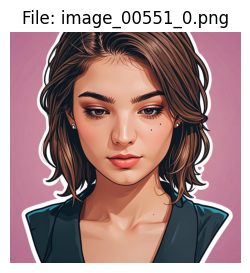

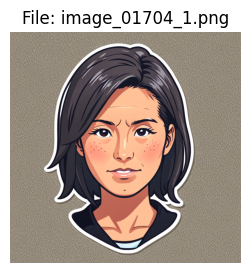

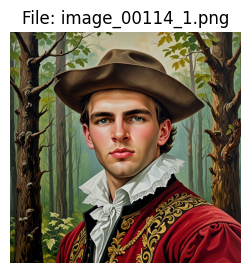

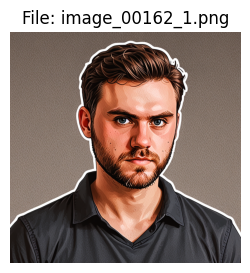

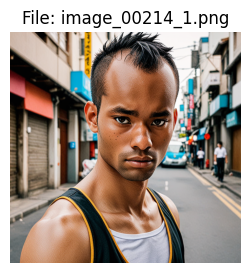

In [ ]:
img_folder = '/content/dataset/trainee_dataset/train'

img_files = [f for f in os.listdir(img_folder) if f.endswith('.png')]

for i in range(5):
    img_path = os.path.join(img_folder, img_files[i])
    img = Image.open(img_path)

    plt.figure(figsize=(3, 3))
    plt.imshow(img)
    plt.title(f'File: {img_files[i]}')
    plt.axis('off')
    plt.show()


# Train/test split

I don't have to divide the dataset into training and testing because it has already been done for me ;)

# Extract Label

How to get the label from the name?
The name has the form image_123_1.png, that is, the last part is the class (0 or 1):

In [1]:
import os
import shutil

train_path = "/content/dataset/trainee_dataset/train"

for filename in os.listdir(train_path):
    if filename.endswith('.png') or filename.endswith('.jpg'):

        class_label = filename.split('_')[-1].split('.')[0]
        class_folder = os.path.join(train_path, class_label)
        os.makedirs(class_folder, exist_ok=True)


        src_path = os.path.join(train_path, filename)
        dst_path = os.path.join(class_folder, filename)
        shutil.move(src_path, dst_path)

print("Pictures are categorized into classes")


Pictures are categorized into classes


In [2]:
test_path = "/content/dataset/trainee_dataset/test"

for filename in os.listdir(test_path):
    if filename.endswith('.png') or filename.endswith('.jpg'):

        class_label = filename.split('_')[-1].split('.')[0]
        class_folder = os.path.join(test_path, class_label)
        os.makedirs(class_folder, exist_ok=True)


        src_path = os.path.join(test_path, filename)
        dst_path = os.path.join(class_folder, filename)
        shutil.move(src_path, dst_path)

print("Pictures are categorized into classes")


Pictures are categorized into classes


# Train the model

Recently, I compared the performance of three models: Plain 3-layer CNN, and Frozen Pre-trained ResNet (Feature Extractor) and Fine-tuned Pre-trained ResNet. I can say that the Fine-tuned Pre-trained ResNet performed the best because after defrosting the last layers of ResNet and retraining on a new dataset, the model gained high generalization ability. The Frozen Pre-trained ResNet performed well, but due to the “frozen” layers, the model does not adapt to the specifics of the new dataset, which limits further improvement in accuracy.
Therefore, in this task, I will immediately proceed to using Fine-tuned Pre-trained models

### Importing libraries and data preparation/loading

In [3]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score
import numpy as np

In [4]:
data_dir = '/content/dataset'
batch_size = 32
image_size = 224

train_transforms = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


In [5]:
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'trainee_dataset/train'), transform=train_transforms)
test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'trainee_dataset/test'), transform=test_transforms)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### Побудова моделі та тренування

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(pretrained=True)

for param in model.parameters():
    param.requires_grad = True

num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)

model = model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Why did I choose ResNet18?

I have had experience using it in similar tasks that are classified as ResNet (Residual Network), one of the most popular types of deep convolutional neural networks (CNNs) that solves the problem of gradient fading when training very deep networks.  It contains 18 layers, which makes it not too big (unlike ResNet50 or ResNet101),
fast to train,
and still powerful enough for many image classification tasks.
It is often used as a baseline model.
There are pre-trained weights (pretrained=True) on ImageNet, so the model already knows how to “see” basic patterns (edges, colors, textures, parts of objects).


ResNet has already been trained on huge datasets such as ImageNet (14+ million images, 1000 classes). They are able to “see” complex visual patterns: edges, textures, objects, etc.


In [7]:
def train_model(model, train_loader, test_loader, patience=5, max_epochs=100):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)

    best_loss = float('inf')
    trigger_times = 0

    for epoch in range(max_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(test_loader)

        print(f"Epoch {epoch+1}, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_val_loss:.4f}")

        # Early Stopping
        if avg_val_loss < best_loss:
            best_loss = avg_val_loss
            trigger_times = 0
            best_model_state = model.state_dict()
        else:
            trigger_times += 1
            print(f"EarlyStopping counter: {trigger_times} out of {patience}")
            if trigger_times >= patience:
                print("Early stopping triggered!")
                model.load_state_dict(best_model_state)
                break

    return model


In [8]:
def evaluate_model(model, dataloader):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.numpy())

    micro_f1 = f1_score(all_labels, all_preds, average='micro')
    print(f"Micro F1 Score: {micro_f1:.4f}")
    return micro_f1

In [10]:
train_model(model, train_loader, test_loader)

Epoch 1, Train Loss: 0.3433, Test Loss: 0.1441
Epoch 2, Train Loss: 0.1137, Test Loss: 0.1408
Epoch 3, Train Loss: 0.0671, Test Loss: 0.1357
Epoch 4, Train Loss: 0.0348, Test Loss: 0.1614
EarlyStopping counter: 1 out of 5
Epoch 5, Train Loss: 0.0201, Test Loss: 0.1493
EarlyStopping counter: 2 out of 5
Epoch 6, Train Loss: 0.0200, Test Loss: 0.1699
EarlyStopping counter: 3 out of 5
Epoch 7, Train Loss: 0.0117, Test Loss: 0.1688
EarlyStopping counter: 4 out of 5
Epoch 8, Train Loss: 0.0075, Test Loss: 0.1867
EarlyStopping counter: 5 out of 5
Early stopping triggered!


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [11]:
f1 = evaluate_model(model, test_loader)

Micro F1 Score: 0.9550


In [12]:
f1

0.955

In [13]:
torch.save(model.state_dict(), 'trainee_fine_tuned_resnet.pt')


### Аналіз та візуалізація результатів

In [21]:
from sklearn.metrics import accuracy_score

def evaluate_accuracy(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return accuracy_score(all_labels, all_preds)

train_accuracy = evaluate_accuracy(model, train_loader)
test_accuracy = evaluate_accuracy(model, test_loader)

Final Train Accuracy: 0.9889
Final Validation/Test Accuracy: 0.9550


In [22]:
from sklearn.metrics import classification_report, confusion_matrix


all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

# Classification report
target_names = train_dataset.classes
print(classification_report(all_labels, all_preds, target_names=target_names))


# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
print("Confusion matrix shape:", cm.shape)


              precision    recall  f1-score   support

           0       1.00      0.55      0.71        20
           1       0.95      1.00      0.98       180

    accuracy                           0.95       200
   macro avg       0.98      0.78      0.84       200
weighted avg       0.96      0.95      0.95       200

Confusion matrix shape: (2, 2)


I trained a ResNet-based model for a binary image classification task where I had to determine whether an image contains artifacts (e.g., extra fingers, text, distorted eyes, etc.) that occur when neural networks generate images.

The model has learned to recognize class 1 (i.e., “artifact is present”) very well, with an accuracy of 95%+.
But it performs worse with class 0 (i.e., “no artifacts”). The accuracy is 100%, but the Recall is only 55%, which means that the model often mistakes an image with a normal face for an artifact.
Overall, the model achieved an accuracy of 95.5% on the test, but the F1-micro score of 0.955 hides the fact that it does not work well with both classes.


EarlyStopping stopped training after 8 epochs because the Test Loss started to grow rather than decrease, which is a sign of overfitting.
That is, the model learned the training data well, but gradually began to perform worse on validation, so it was stopped.


In the process of training the ResNet-based model for the binary image classification task, the following results were achieved:
The final accuracy on the training set was 98.89%, and on the validation set was 95.50%.

The value of the micro F1 measure on the test set is 0.955.
The model perfectly classifies images with artifacts (Recall = 1.0), but has problems recognizing images without artifacts (Recall = 0.55).
There was a gradual decrease in performance during validation, while the results during training improved, indicating that the model was overtrained. This was the basis for applying EarlyStopping, which stopped the training at the 8th epoch.
Thus, the resulting model achieves high overall accuracy, but requires additional work on the balance between classes, especially to improve the performance in the “artifact-free” class.

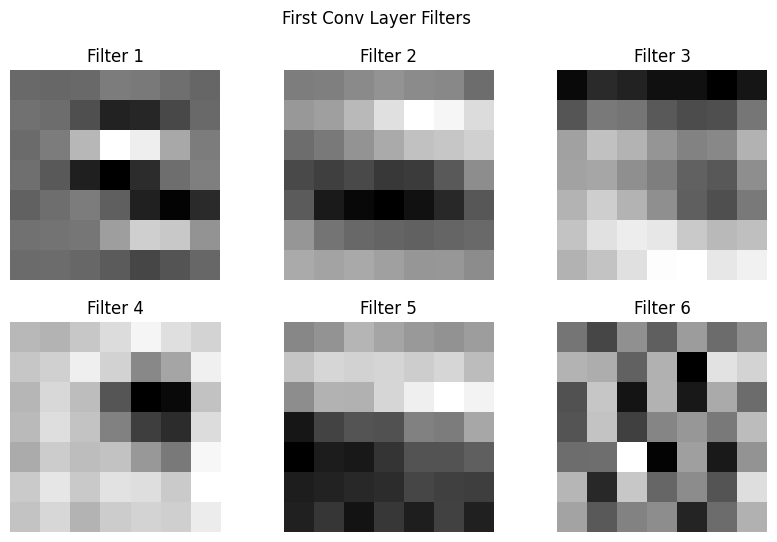

In [28]:
import matplotlib.pyplot as plt

conv1_weights = model.conv1.weight.data.cpu()

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    filt = conv1_weights[i]
    img = filt.mean(dim=0).numpy()
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Filter {i+1}')
    ax.axis('off')
plt.suptitle("First Conv Layer Filters")
plt.show()


In [38]:
import matplotlib.pyplot as plt

def visualize_feature_maps(model, image, device, layer_name='layer1'):
    model.eval()
    image = image.unsqueeze(0).to(device)

    activation = {}

    def hook_fn(module, input, output):
        activation[layer_name] = output.detach().cpu()

    layer = dict([*model.named_modules()])[layer_name]
    hook = layer.register_forward_hook(hook_fn)

    with torch.no_grad():
        _ = model(image)

    hook.remove()

    feature_maps = activation[layer_name][0]
    num_features = feature_maps.shape[0]

    plt.figure(figsize=(20, 20))
    for i in range(min(16, num_features)):
        plt.subplot(4, 4, i + 1)
        plt.imshow(feature_maps[i], cmap='viridis')
        plt.axis('off')
    plt.show()


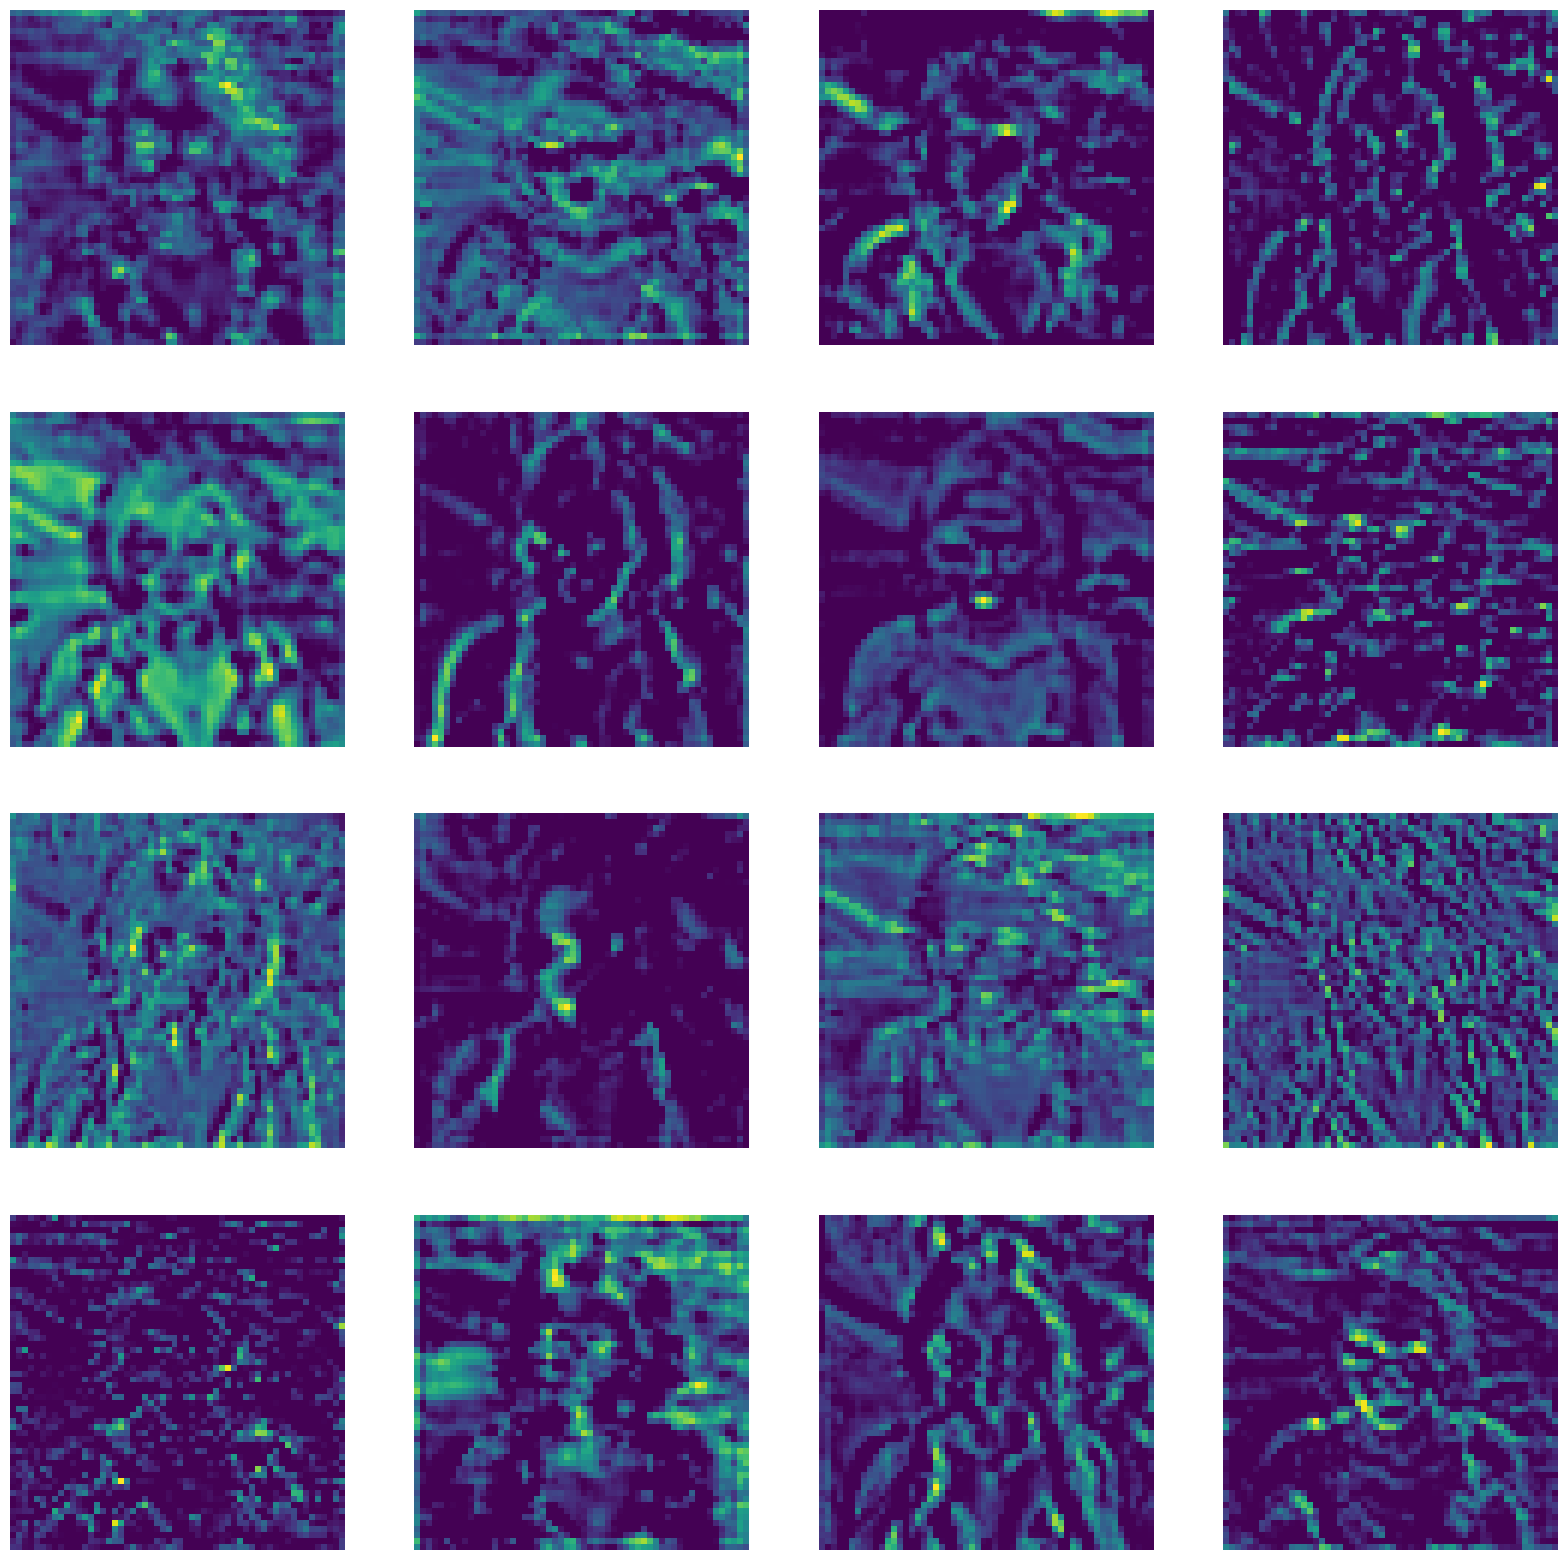

In [41]:
images, _ = next(iter(test_loader))
image = images[0]

visualize_feature_maps(model, image, device, layer_name='layer1')


This image is a visualization of the activations (feature maps) of one of the convolutional layers in your neural network after passing the image through the model.

What is depicted here:
Each image is the result of one convolutional layer filter (kernel).
They show what features the network detects at different stages:
at the initial layers - usually edges, contours, textures;
at deeper layers - more complex structures, objects, or parts of objects.


So if I upload a photo of a person to the web, for example, then:
some filters detect facial contours;
others detect hair, background, shoulders, etc.
What is visible on these maps is what each filter pays attention to.
It's a good sign if the filters show structure, not just noise, which means the model is learning.

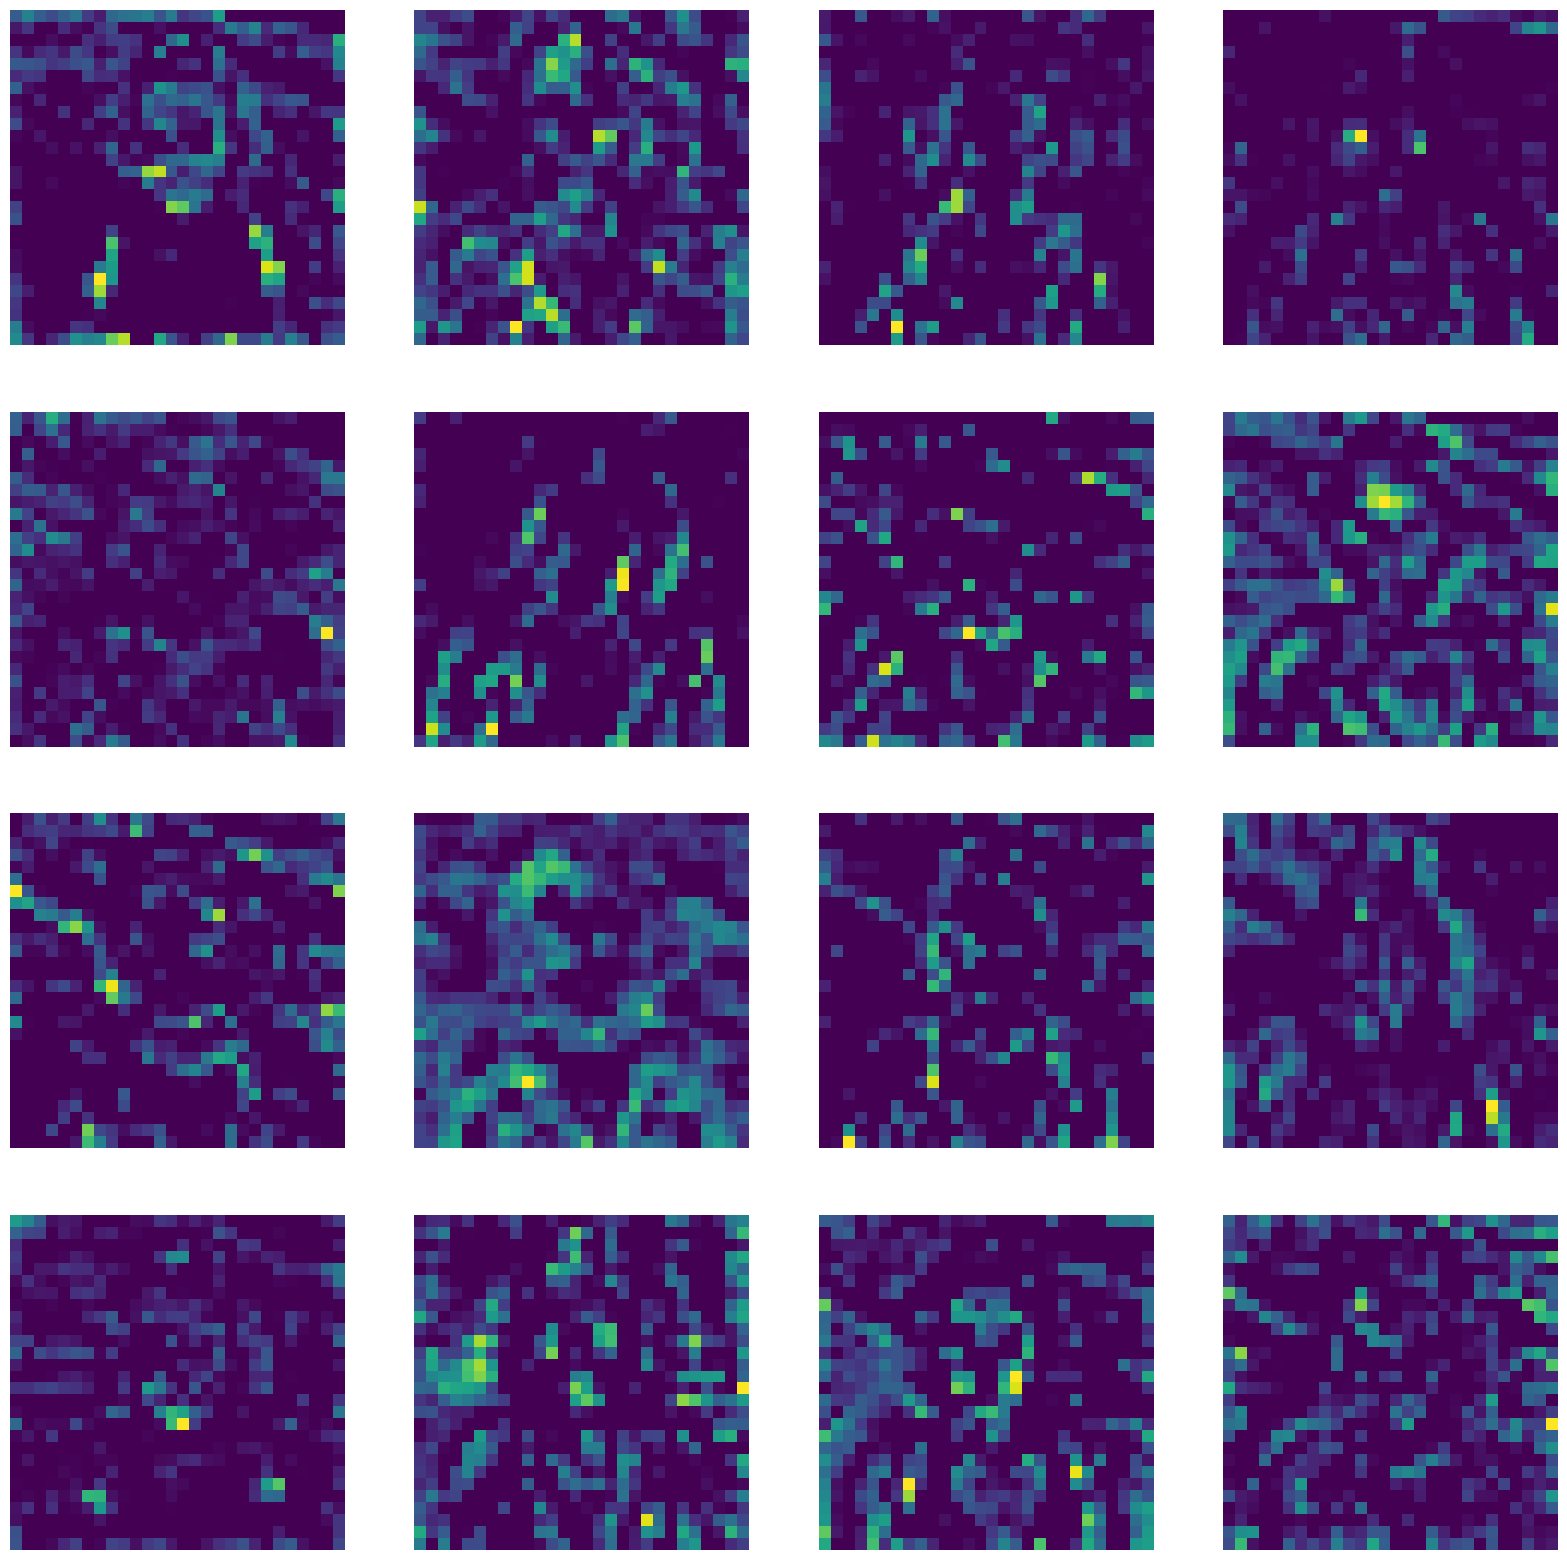

In [43]:
images, _ = next(iter(test_loader))
image = images[0]

visualize_feature_maps(model, image, device, layer_name='layer2')


Okay, now we have activations from layer2, the second layer of the network — and this looks absolutely logical for a deeper level of filters.

we see more complex textures, contours, even semi-silhouettes or parts of objects.
Some filters show very local structures (points/lines), others show more global patterns (like blurred shapes, curves, etc.).
I can see how in the central maps you can see concentric figures or patterns — these are already the first "generalizations" of lower features.


If the filters see not just noise, but structure, then the model is really learning to extract important information.
At this stage, the model can already differentiate: "is this the corner of the face", "is this the edge of the object", or "where is the background, and where is the object".

The featuremap shows that there are “blind” filters, but we are still testing with code:

In [45]:
conv1_weights = model.conv1.weight.data.cpu().numpy()
for i, w in enumerate(conv1_weights):
    std = w.std()
    mean = w.mean()
    if std < 1e-4:
        print(f"Filter {i} might be blind: mean={mean:.5f}, std={std:.5f}")

Filter 2 might be blind: mean=0.00000, std=0.00000
Filter 4 might be blind: mean=0.00000, std=0.00000
Filter 7 might be blind: mean=-0.00000, std=0.00000
Filter 9 might be blind: mean=0.00000, std=0.00000
Filter 13 might be blind: mean=-0.00000, std=0.00000
Filter 36 might be blind: mean=-0.00000, std=0.00000
Filter 38 might be blind: mean=-0.00000, std=0.00000
Filter 48 might be blind: mean=0.00000, std=0.00000


There are indeed “blind filters” here, i.e., those that do not react to the input images at all. This is evident from the fact that their mean and standard deviation are both zero.

I think this happened for several reasons:

The first is that we have frozen layers, and if the filters are in the frozen part of the model (for example, layer2, layer4, etc. in ResNet-18), they are not updated during training - that is, they remain as they were in the ImageNet-trained model.

Also, sometimes even the layers that we train have gradients that are too small, and the filter “dies”. And it can also happen that filters don't find features to react to.